# Movie Data Analysis For Microsoft

![](./Images/theatre_seat.jpg)

# Overview

***This project analyzes a number of movie datasets as included in the Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and
The Numbers in  order to better understand the success of movies within other studios. 
The goal of this analysis is to then assess and help create business recommendations to present to Microsoft, as they attempt to
open and manage their own movie studio.***

## **Business Understanding**

![](./Images/roi2.jpg)

**The movie dataset that I will present has a variety of metrics that I will use to better explain and extrapolate the 
potential success of Microsoft Movie Studios. Microsoft may be able to create a movie studio to be both profitable and
successful, while also ensuring that they remain competitive in the entertainment landscape. Doing so will allow Microsoft
to expand their client base, as well as grow their resources in expanding into a different service than what is already offered.
Using the different movie databases as datasets, I will describe different industry patterns, techniques, and cycles to help
keep Microsoft competitive in all their services.** 

## **Data Understanding**

![](./Images/roi.jpg)

**In order to help Microsoft create their movie studio, I have used some of the most established movie datasets available. Every 
movie has their own subsequent data to inform us about its profitability, success.**

## **Data Manipulation and Analysis with pandas**

-Formatting the data

-Cleaning the data

-Exploring the metric that will help us give our recommendation to Microsoft

-Give our recommendation base on our findings

## **Data Preparation**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### EDA for bom_movie_gross

In [2]:
#  Creating df for 
bom_movie_gross_df = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
bom_movie_gross_df.shape

(3387, 5)

In [4]:
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
#Checking the number of studios
bom_movie_gross_df.studio.value_counts()

IFC           166
Uni.          147
WB            140
Fox           136
Magn.         136
             ... 
E1              1
PI              1
ELS             1
PalT            1
Synergetic      1
Name: studio, Length: 257, dtype: int64

In [6]:
#domestic_gross count
bom_movie_gross_df.domestic_gross.value_counts().sum()

3359

In [7]:
#foreign_gross count
bom_movie_gross_df.foreign_gross.value_counts().sum()

2037

In [8]:
#checking for Nan
bom_movie_gross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [9]:
#checking the columns
bom_movie_gross_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

### EDA for tn_movie_budget_df

In [10]:
#  Creating df for 
tn_movie_budget_df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
tn_movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [11]:
tn_movie_budget_df.shape

(5782, 6)

In [12]:
tn_movie_budget_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

### Data cleaning for the columns

In [13]:
#cleaning for production_budget
tn_movie_budget_df['production_budget'] = tn_movie_budget_df['production_budget'].str.replace('$',  "")
tn_movie_budget_df['production_budget'] = tn_movie_budget_df['production_budget'].str.replace(',',  "")


In [14]:
tn_movie_budget_df['production_budget'].astype(float)

0       425000000.0
1       410600000.0
2       350000000.0
3       330600000.0
4       317000000.0
           ...     
5777         7000.0
5778         6000.0
5779         5000.0
5780         1400.0
5781         1100.0
Name: production_budget, Length: 5782, dtype: float64

In [15]:
#cleaning for domestic_gross
tn_movie_budget_df['domestic_gross'] = tn_movie_budget_df['domestic_gross'].str.replace('$',  "")
tn_movie_budget_df['domestic_gross'] = tn_movie_budget_df['domestic_gross'].str.replace(',',  "")

In [16]:
tn_movie_budget_df['domestic_gross'].astype(float)

0       760507625.0
1       241063875.0
2        42762350.0
3       459005868.0
4       620181382.0
           ...     
5777            0.0
5778        48482.0
5779         1338.0
5780            0.0
5781       181041.0
Name: domestic_gross, Length: 5782, dtype: float64

In [17]:
#cleaning for worldwide_gross
tn_movie_budget_df['worldwide_gross'] = tn_movie_budget_df['worldwide_gross'].str.replace('$',  "")
tn_movie_budget_df['worldwide_gross'] = tn_movie_budget_df['worldwide_gross'].str.replace(',',  "")

In [18]:
tn_movie_budget_df['worldwide_gross'].astype(float)

0       2.776345e+09
1       1.045664e+09
2       1.497624e+08
3       1.403014e+09
4       1.316722e+09
            ...     
5777    0.000000e+00
5778    2.404950e+05
5779    1.338000e+03
5780    0.000000e+00
5781    1.810410e+05
Name: worldwide_gross, Length: 5782, dtype: float64

In [19]:
#checking df after cleaning
tn_movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [20]:
# Checking for Nah
tn_movie_budget_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [21]:
# Extracting the year and month from the release_date
tn_movie_budget_df['release_date'] = pd.to_datetime(tn_movie_budget_df['release_date'])

In [22]:
tn_movie_budget_df['year'] = tn_movie_budget_df['release_date'].dt.year 

In [23]:
tn_movie_budget_df.dtypes

id                            int64
release_date         datetime64[ns]
movie                        object
production_budget            object
domestic_gross               object
worldwide_gross              object
year                          int64
dtype: object

In [24]:
tn_movie_budget_df['month'] = tn_movie_budget_df['release_date'].dt.month

In [25]:
tn_movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12


In [26]:
tn_movie_budget_df.shape

(5782, 8)

In [27]:
tn_movie_budget_df.dtypes

id                            int64
release_date         datetime64[ns]
movie                        object
production_budget            object
domestic_gross               object
worldwide_gross              object
year                          int64
month                         int64
dtype: object

**changing the types of domestic_gross, production_budget, worldwide_gross from Object to int**


In [28]:
tn_movie_budget_df['domestic_gross'] = tn_movie_budget_df['domestic_gross'].astype(int)

In [29]:
tn_movie_budget_df['production_budget'] = tn_movie_budget_df['production_budget'].astype(int)

In [30]:
tn_movie_budget_df['worldwide_gross'] = tn_movie_budget_df['worldwide_gross'].astype(int)

In [31]:
# rechecking the types
tn_movie_budget_df.dtypes

id                            int64
release_date         datetime64[ns]
movie                        object
production_budget             int64
domestic_gross                int64
worldwide_gross               int64
year                          int64
month                         int64
dtype: object

### Feature Engineering

 **Calculating the ROI (return on investment  so I can plot them against some  metrics like month of release, Domestic, and Genres**

**Extracted Month feature, created avg_profit_per_month, ww_profit to better evaluate the ROI in my analysis**

In [32]:
#domestic_gross

profit_ret_on_investment = tn_movie_budget_df['domestic_gross']  - tn_movie_budget_df['production_budget']

In [33]:
profit_ret_on_investment

0       335507625
1      -169536125
2      -307237650
3       128405868
4       303181382
          ...    
5777        -7000
5778        42482
5779        -3662
5780        -1400
5781       179941
Length: 5782, dtype: int64

In [34]:
#adding the roi column to our df
tn_movie_budget_df['profit_ret_on_investment'] = tn_movie_budget_df['domestic_gross']  - tn_movie_budget_df['production_budget']

In [35]:
tn_movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,profit_ret_on_investment
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,12,335507625
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5,-169536125
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,6,-307237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,128405868
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12,303181382


In [36]:
tn_movie_budget_df.shape

(5782, 9)

In [37]:
tn_movie_budget_df['month'].value_counts()

12    745
10    573
8     496
9     493
11    486
6     479
3     470
4     454
7     440
5     407
2     392
1     347
Name: month, dtype: int64

In [38]:
#Domestic mean
avg_profit_per_month = tn_movie_budget_df.groupby('month').mean()['profit_ret_on_investment']

In [39]:
#Domestic mean
avg_profit_per_month

month
1     3.106128e+06
2     7.368234e+06
3     7.790907e+06
4     3.525568e+06
5     1.956275e+07
6     2.272879e+07
7     1.818188e+07
8     6.612111e+06
9     1.336985e+06
10    4.030837e+06
11    1.558112e+07
12    1.284921e+07
Name: profit_ret_on_investment, dtype: float64

In [40]:
#creating a column for the worldwide profit
tn_movie_budget_df['ww_profit'] = tn_movie_budget_df['worldwide_gross']  - tn_movie_budget_df['production_budget']

In [41]:
tn_movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,profit_ret_on_investment,ww_profit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,12,335507625,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5,-169536125,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,6,-307237650,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,128405868,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12,303181382,999721747


In [42]:
#finding the mean/avg of the  ww profit(calculating the avg worldwide profit per month)
avg_ww_profit = tn_movie_budget_df.groupby('month').mean()['ww_profit']

In [43]:
#Worldwide mean
avg_ww_profit

month
1     2.572033e+07
2     4.349811e+07
3     4.985129e+07
4     3.611743e+07
5     1.151328e+08
6     9.942391e+07
7     9.841746e+07
8     3.542232e+07
9     2.488078e+07
10    2.907190e+07
11    9.314157e+07
12    6.844157e+07
Name: ww_profit, dtype: float64

## SQL Data

The below line should only need to be run once. It unzips the SQL data, since SQLite doesn't work with zipped data.**

The below line should only need to be run once. It unzips the SQL data, since SQLite doesn't work with zipped data.

In [44]:
! unzip -n zippedData/im.db.zip

Archive:  zippedData/im.db.zip


In [45]:
import sqlite3

In [46]:
conn = sqlite3.connect("im.db")

### EDA for movie_basics

In [47]:
#im_db_df
movie_basics_df = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [48]:
movie_basics_df.shape

(146144, 6)

In [49]:
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [50]:
movie_basics_df.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [51]:
# crating a new columns 
movie_basics_df['genre_list'] = movie_basics_df['genres'].str.split(',')

In [52]:
tn_movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,profit_ret_on_investment,ww_profit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,12,335507625,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5,-169536125,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,6,-307237650,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,128405868,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12,303181382,999721747


In [53]:
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genre_list
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama","[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama","[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama","[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"


## Merging Datasets


In [54]:
#creating a new table by merging my two df
df_base = pd.merge(movie_basics_df, tn_movie_budget_df, left_on=['primary_title', 'start_year'], right_on=['movie', 'year'], how= 'inner' )

In [55]:
df_base.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genre_list,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,profit_ret_on_investment,ww_profit
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy","[Action, Animation, Comedy]",26,2012-12-31,Foodfight!,45000000,0,73706,2012,12,-45000000,-44926294
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama","[Adventure, Comedy, Drama]",37,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,2013,12,-32763162,96861183
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama","[Action, Crime, Drama]",67,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,2014,9,-1982315,34108587
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",34,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015,6,437270625,1433854864
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama","[Comedy, Drama]",16,2011-10-28,The Rum Diary,45000000,13109815,21544732,2011,10,-31890185,-23455268


In [56]:
df_base.drop(columns=['genre_list'])

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,profit_ret_on_investment,ww_profit
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,2012-12-31,Foodfight!,45000000,0,73706,2012,12,-45000000,-44926294
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,2013,12,-32763162,96861183
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",67,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,2014,9,-1982315,34108587
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015,6,437270625,1433854864
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",16,2011-10-28,The Rum Diary,45000000,13109815,21544732,2011,10,-31890185,-23455268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,tt8364368,Crawl,Crawl,2019,NaN,"Action,Horror,Thriller",16,2019-07-12,Crawl,17000000,0,0,2019,7,-17000000,-17000000
1543,tt8408152,Detention,Detention,2012,NaN,Horror,45,2012-04-13,Detention,10000000,0,0,2012,4,-10000000,-10000000
1544,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,29,2018-09-21,Fahrenheit 11/9,5000000,6352306,6653715,2018,9,1352306,1653715
1545,tt8852552,Icarus,Icarus,2010,78.0,Thriller,91,2010-02-09,Icarus,6000000,0,0,2010,2,-6000000,-6000000


In [57]:
#making  a copy of my df_base

df = df_base.copy()

In [58]:
#using explode() function to separe the genres
df_explode = df.explode('genre_list')

In [59]:
df_explode.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genre_list,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,profit_ret_on_investment,ww_profit
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",Action,26,2012-12-31,Foodfight!,45000000,0,73706,2012,12,-45000000,-44926294
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",Animation,26,2012-12-31,Foodfight!,45000000,0,73706,2012,12,-45000000,-44926294
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",Comedy,26,2012-12-31,Foodfight!,45000000,0,73706,2012,12,-45000000,-44926294
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",Adventure,37,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,2013,12,-32763162,96861183
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",Comedy,37,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,2013,12,-32763162,96861183


In [60]:
df_explode.groupby('genre_list')

In [61]:
df_explode.shape

(3887, 17)

In [62]:
df_explode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3887 entries, 0 to 1546
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   movie_id                  3887 non-null   object        
 1   primary_title             3887 non-null   object        
 2   original_title            3887 non-null   object        
 3   start_year                3887 non-null   int64         
 4   runtime_minutes           3846 non-null   float64       
 5   genres                    3881 non-null   object        
 6   genre_list                3881 non-null   object        
 7   id                        3887 non-null   int64         
 8   release_date              3887 non-null   datetime64[ns]
 9   movie                     3887 non-null   object        
 10  production_budget         3887 non-null   int64         
 11  domestic_gross            3887 non-null   int64         
 12  worldwide_gross     

In [63]:
#copy of my df_explode

df = df_explode.copy()

In [64]:
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genre_list,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,profit_ret_on_investment,ww_profit
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",Action,26,2012-12-31,Foodfight!,45000000,0,73706,2012,12,-45000000,-44926294
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",Animation,26,2012-12-31,Foodfight!,45000000,0,73706,2012,12,-45000000,-44926294
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",Comedy,26,2012-12-31,Foodfight!,45000000,0,73706,2012,12,-45000000,-44926294
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",Adventure,37,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,2013,12,-32763162,96861183
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",Comedy,37,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,2013,12,-32763162,96861183


In [65]:
roi_genres_df = df[['genre_list', 'profit_ret_on_investment']]
roi_genres_df.head(25)

,genre_list,profit_ret_on_investment
0,Action,-45000000
0,Animation,-45000000
0,Comedy,-45000000
1,Adventure,-32763162
1,Comedy,-32763162
1,Drama,-32763162
2,Action,-1982315
2,Crime,-1982315
2,Drama,-1982315
3,Action,437270625


### Analysis

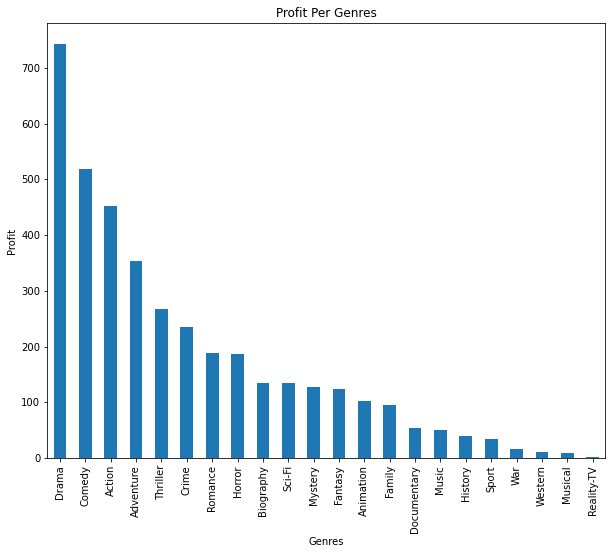

In [66]:
#Data for 1st recommendation - Genre with the highest roi
roi_genres_df['genre_list'].value_counts().plot.bar(figsize=(10,8)).set(
    title='Profit Per Genres',
    xlabel='Genres',
    ylabel='Profit'
);

In [67]:
#Data for my 2nd recommendation 
release_month = df_base.groupby('month').count()['profit_ret_on_investment'].sort_values(ascending=False)[:10]

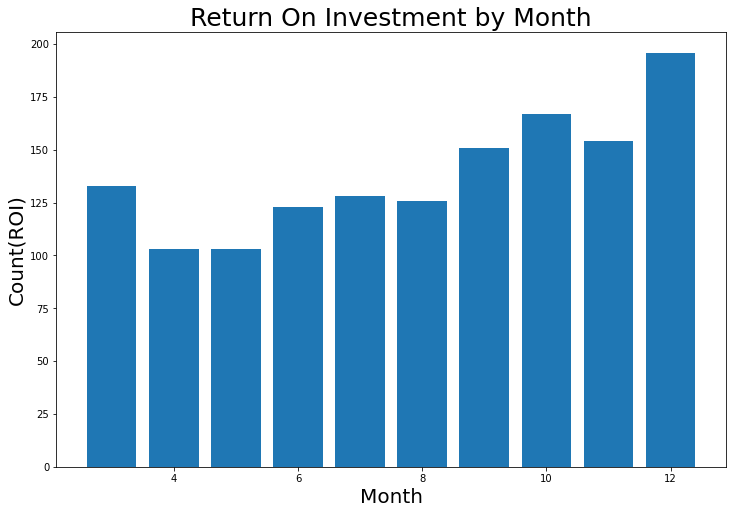

In [68]:
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(release_month.index, release_month.values)
plt.title('Return On Investment by Month',  fontsize=25)# release month with higher roi
plt.xlabel('Month', fontsize=20)
plt.ylabel('Count(ROI)', fontsize=20)
ax.set;

#plt.savefig("./images/Return_On_Investment_by_Month.png", dpi=150)

In [69]:
#Data for my 3rd recommendation
studios = bom_movie_gross_df.groupby('studio').mean()['domestic_gross'].sort_values(ascending=False)[:10]

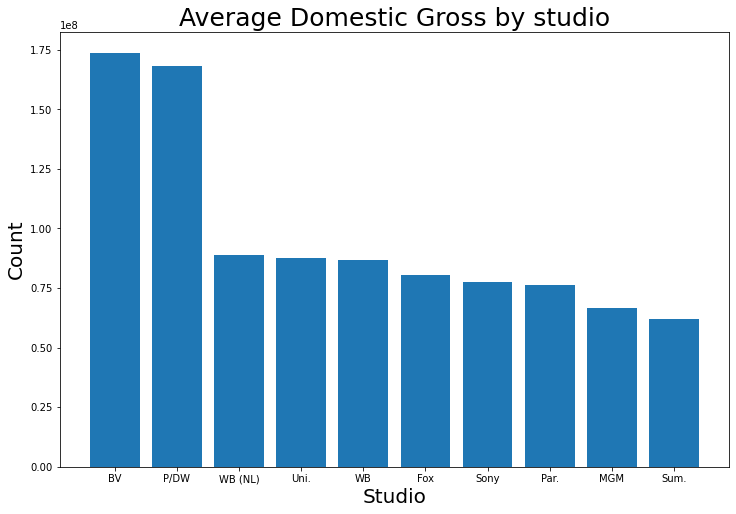

In [70]:
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(studios.index, studios.values)
plt.title('Average Domestic Gross by studio',  fontsize=25)
plt.xlabel('Studio', fontsize=20)
plt.ylabel('Count', fontsize=20)
ax.set;

# Recommendations

**This analysis leads to three reommendations taht will guide Microsoft Stackholders in creating their Movie studio with better profitability at the sam time satisfy thhis audience.**

**#1 -  Genre with the highest Return On Investment
(Profit per genres)**  

Based on the data in the df_profit_per_genres and the genrelist_df  along with the visualization,
we recommend that Microsoft focuses on specific genres over others in order to maximize overall profitability.
As we can infer, certain genres very clearly perform better in the Box Office, such as Drama and Comedy. 

**#2 -  Strong release timelines both domestically and worldwide (avg_profit_per_month,avg_ww_profit)/Release Month with the highest Return On Investment**

The return on investment (ROI) domestically versus worldwide speaks to different patterns. Domestically, the ROI directly draws
a line between American culture, holidays, and traditions. From that, we can see that the most profitable months are February,
March, August, and October. Respectively, that speaks to Valentine's Day and Black History Month, Women's Month, the end of 
summertime, and Halloween. Because these are such strong times in American culture, it only makes sense that they create the 
most amount of profit for studios.


**#3 - Best Performing Studio vs Production Budget**

Regarding the information amassed above, we can infer that the best performing film studios, Buena Vista Walt Disney, Paramount
DreamWorks, and Warner Brothers New Line Cinema have the highest returns due to their budgets. I do believe that Microsoft can
compete with these studios as they have a similar capital, therefore is able to bring similar budgets to their films.

# Next Steps

Further analyses could yeild addition insights to further inform Microsoft's Studio Efforts such as:


**Target international audience**

*Worldwide, the ROI follows traditional quarterly film release schedules.*

**- Quarter** 1 generally finds post-Holiday movies that are less critically acclaimed. This is usually where we find romance,
Black-led, and women-led movies. Because these categories are less emphasized in the foreign markets, they typically don't 
get much attention outside of the domestic market.

**- Quarter 2** is normally seen as Blockbuster season for action movies. The season overall starts with romantic comedies, as the industry exits Q1, and moves into comedies and action movies. Moreover,
this is where we predominantly see the superhero season begin, with the more mature films coming in this quarter. 

**- Quarter 3** more often than not is where the family friendly films come out as this where theatres start to see nore traffic 
worldwide. This is also peak superhero season as we see more age appropriate content released for the masses. We also see the 
child friendly comedies phase out and go into more dramatic action movies.

**- Quarter 4** sees "Oscars" release season, especially with dramatic films. This is also routinely where and when Holiday movies 
are released worldwide to align with the holiday season. Occasionally, overflow Blockbusters are released at this time to 
prevent flooding the theaters with the same type of movies in other quarters. 

**Quarters 2 through 4 are more likely to have at least one Blockbuster release in order to keep the quarter most profitable.**

**Create Original Content** 

- Focus original content on most popular genres

- Find new writers to introduce new voices

- Forgo limits imposed by other studios

**Venture into Different Media**

- Create television programming

- Open the door for family friendly and childrens content

- Take ownership of least performing genres

In [71]:
conn.close()